In [2]:
# Autoencoders - Unsupervised Learning

In [3]:
# Used for
# dimensionality reduction and noise removal

In [4]:
# Difference between ANN and Autoencoder is latter has the same number of output layers as input layers

In [5]:
# The hidden layer reduces the dimonsionality to take the most important features (23 features, cant be presented in space)
# 3 features can be presented in 3d

In [6]:
# Encoder and Decoder 
# We grab the encoder - which reduces dimensionality; when it comes to decoder,
# it does check whether the encoder reduces dimensioanlity correctly by making sure that model retains main features 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.datasets import make_blobs

In [10]:
data = make_blobs(n_samples=300,
                 n_features=2, 
                 centers=2, 
                 cluster_std=1.0, 
                 random_state=101)

In [12]:
type(data)

tuple

In [13]:
X, y = data

In [16]:
np.random.seed(101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [17]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [18]:
feat = pd.DataFrame(X)

In [20]:
feat = pd.concat([feat, z_noise], axis=1)

In [21]:
feat.columns = ['X1', 'X2', 'X3']

In [22]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


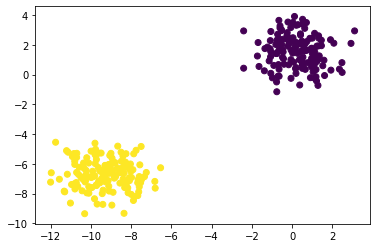

In [27]:
plt.scatter(feat['X1'], feat['X2'], c=y )

In [40]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


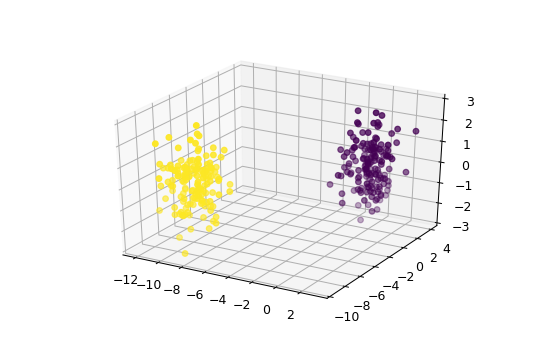

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
from tensorflow.keras.optimizers import SGD
# learning rate 

In [46]:
# 3 -> 2-> 3

In [49]:
encoder = Sequential()
encoder.add(Dense(2, activation='relu', input_shape=[3]))
# we r going from 3 as input to 2 in hidden layer

Instructions for updating:
Colocations handled automatically by placer.


In [50]:
decoder = Sequential()
decoder.add(Dense(3, activation='relu', input_shape=[2]))
# we r going from 2 as input to 3 in hidden layer

In [51]:
autoencoder = Sequential([encoder, decoder])

In [52]:
autoencoder.compile(loss='mse', optimizer=SGD(lr=1.5))

Instructions for updating:
Use tf.cast instead.


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [54]:
scaled_data = scaler.fit_transform(feat)

In [55]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
300/300 [==============================] - 0s 1ms/sample - loss: 0.1806
Epoch 2/5
300/300 [==============================] - 0s 50us/sample - loss: 0.3461
Epoch 3/5
300/300 [==============================] - 0s 57us/sample - loss: 0.3350
Epoch 4/5
300/300 [==============================] - 0s 50us/sample - loss: 0.3350
Epoch 5/5
300/300 [==============================] - 0s 57us/sample - loss: 0.3350


In [63]:
encoded_2dim = encoder.predict(scaled_data)

In [64]:
encoded_2dim.shape

(300, 2)

In [65]:
scaled_data.shape

(300, 3)

In [66]:
plt.scatter(encoded_2_dim[:,0], encoded_2_dim[:,1])

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method